In [11]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))


In [20]:
''' 
This script will parse through the results folder returned from the pipeline execution and provide a list of 
the jobs that failed to complete.
Save the missing job numbers into a csv. 7361 jobs were supposed to run
'''
import os
import numpy as np
import pandas as pd

results = os.listdir('/home/toyonaga/scratch/pipeline/results')
compare = np.arange(int(input('how many jobs ran?')))

job_nums = [] #will be an int array 
for filename in results:
    try:
        start = filename.find('_') + 1 
        end = filename.find('.', start)
        job_nums.append(int(filename[start:end]))
    except:
        print('err')
        continue
print(len(job_nums))

missing = [] #list of jobs that didnt complete
for i in compare:
        if compare[i] not in job_nums:
            missing.append(compare[i])
            
print('missed this many jobs: '+ str(len(missing)))


failed = {'job':missing}

df =pd.DataFrame(data=failed)   
df.to_csv('missed_jobs.csv', index= False)

how many jobs ran? 7363


2971
missed this many jobs: 4392


In [4]:
data, hdr = fits.getdata(DWNLD_PATH + str(2) + ".fits", 1, header=True) #'sci' image[1] data and header

In [46]:
jobs = pd.read_csv('/home/toyonaga/projects/def-sfabbro/toyonaga/HSTLens/CC_batch_processing/missed_jobs.csv')
jobs['job'][1]+2

7

In [3]:
from IPython import display
import pandas as pd
import os
import time 
import subprocess
from astropy import wcs
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import numpy as np
import random
import matplotlib.pyplot as plt

DWNLD_PATH = "dwnlds/c_"
RESULTS_PATH = "/home/toyonaga/scratch/pipeline/results/"# '/home/toyonaga/scratch/pipeline/results_recover_2/'#
start = int(input('start from this results file '))
end = int(input("end at this results file "))
CSV_PATH="test_csv" #shouldn't have to change

OUT_PATH_1 = "class_1/c_"
OUT_PATH_2 = "class_2/c_"
OUT_PATH_3 = "class_3/c_" #crowded
OUT_PATH_4 = "class_4/c_"
OUT_PATH_5 = "class_5/c_"
OUT_PATH_6 = "class_6/c_"
OUT_PATH_7 = "class_7/c_"
OUT_PATH_8 = "class_8/c_"
OUT_PATH_9 = "class_9/c_" #general fp
OUT_PATH_22 = "class_22/c_" #main source and small satellite source (confused as arclet)
OUT_PATH_33 = "class_33/c_" # single bright source and faint background
im_info = pd.read_csv(CSV_PATH)
# count=0
# for job in range(end-start):
   
#     '''populate coordinate dict with result file info'''

#     try:
#         crd_dict = get_positives(RESULTS_PATH+"results_"+str(job+start)+".out")
#         print(len(crd_dict['ra']))
#         count+=len(crd_dict['prb'])
#     except:
#         print('missing results from job: '+str(job))
#         continue

start from this results file  0
end at this results file  10


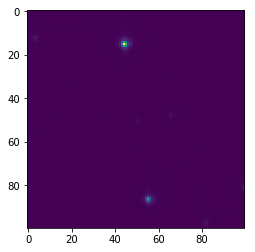

skipped due to non-existent image, or conversion error
missing results from job: 8
missing results from job: 9


In [6]:
def dwnld(entry): 
    subprocess.check_output(["wget", "-O",DWNLD_PATH+str(entry)+ ".fits" ,
                             "http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/"+
                             im_info['obj_name'][entry]+"_drz.fits"]) 

def get_positives(filename):
    #get coords of pred above 0.9
    crd_dict = {"ra": [], "dec":[], "obj_name":[], "prb_1":[] , "prb_2":[] , "prb_3":[] } 
    df = pd.read_csv(filename, sep = ',')
    for row in range(len(df)):
        if (float(df['prb_1'][row]) >= 0.70) :#and (float(df['prb'][row])<0.95) :
            crd_dict['prb_1'].append(df['prb_1'][row])
            crd_dict['ra'].append(df['ra'][row])
            crd_dict['dec'].append(df['dec'][row])
            crd_dict['obj_name'].append(df['obj_name'][row])
    print(len(crd_dict['ra']))
    return crd_dict
        
    
        

for job in range(end-start):
   
    '''populate coordinate dict with result file info'''
    try:
        crd_dict = get_positives(RESULTS_PATH+"results_"+str(job+start)+".out")
        print(len(crd_dict['ra']))
    except:
        print('missing results from job: '+str(job+start))
        continue
        
        
    '''download image cutouts based on the file names''' 
    fails=0
    print("dwnlding image " + str(job+start))
    try: 
        dwnld(job+start)
    except:
        fails+=1
        print("Failed")
        
        print("failed: "+str(fails))
        continue    
        
    '''make 100x100 boxes'''
    data, hdr = fits.getdata(DWNLD_PATH + str(job+start) + ".fits", 1, header=True) #'sci' image[1] data and header
    w = wcs.WCS(hdr)
    exit=False
    for cutout in range(len(crd_dict["obj_name"])):
        try:                                

            pixcrd2 = w.wcs_world2pix([[float(crd_dict['ra'][cutout]), float(crd_dict['dec'][cutout])]], 0)
            centered_cut = Cutout2D(data, (pixcrd2[0][0], pixcrd2[0][1]), (100, 100))
            
            ims=centered_cut.data
#             print(crd_dict['prb'][cutout])

            
            display.clear_output(wait=True)
            plt.imshow(ims) 
            plt.pause(0.10)
            while(1):
                ans = int(input(str(crd_dict['prb_1'][cutout])+"|| logscale =18, log black=19, exit=20, job: "+str(job+start)))

                if ans ==1:
                    fits.writeto(OUT_PATH_1+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==2:
                    fits.writeto(OUT_PATH_2+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==3:
                    fits.writeto(OUT_PATH_3+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==4:
                    fits.writeto(OUT_PATH_4+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==5:
                    fits.writeto(OUT_PATH_5+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==6:
                    fits.writeto(OUT_PATH_6+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==7:
                    fits.writeto(OUT_PATH_7+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==8:
                    fits.writeto(OUT_PATH_8+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==9: 
                    fits.writeto(OUT_PATH_9+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==22: 
                    fits.writeto(OUT_PATH_22+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==33: 
                    fits.writeto(OUT_PATH_33+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    break
                if ans ==18:
                    plt.imshow(np.log10(ims+1)) 
                    plt.pause(0.1)
                if ans ==19:
                    plt.imshow(np.log10(ims+1),cmap='gray') 
                    plt.pause(0.1)
                if ans ==20:
                    exit=True
                    break
            if exit==True:
                break
        except:
            print("skipped due to non-existent image, or conversion error")
        
    if exit==True:
        break



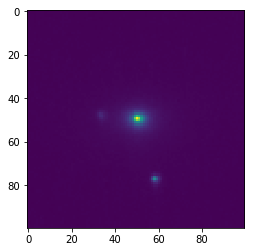

c_152.68164189222514_-4.626367639384708.fits|| logscale =18, log black=19, exit=20, 20


In [2]:
#closer inspection
from IPython import display

import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
PATH = "/home/toyonaga/projects/def-sfabbro/toyonaga/HSTLens/CC_batch_processing/manual_detections/"#HSTLens_detections/"
for filename in os.listdir(PATH):

    data, hdr = fits.getdata(PATH + filename, 0, header=True) #'sci' image[1] data and header
    exit=False
    try:     

        ims=data

        display.clear_output(wait=True)
        plt.imshow(ims) 
        plt.pause(0.10)
        while(1):
            ans = int(input(filename+"|| logscale =18, log black=19, exit=20,"))

            if ans ==18:
                plt.imshow(np.log10(ims+1)) 
                plt.pause(0.1)
            if ans ==19:
                plt.imshow(np.log10(ims+1),cmap='gray') 
                plt.pause(0.1)
            if ans ==20:
                exit=True
                break
        if exit==True:
            break
    except:
        print("skipped due to non-existent image, or conversion error")

    if exit==True:
        break

